**Neural Network Classification in tensorflow**

In [1]:
import tensorflow as tf

In [18]:
from sklearn.datasets import make_circles
## making 1000 exaamples
n_samples = 1000
## creating the circles
X,y = make_circles(n_samples,noise=.03,random_state=42)
## check features and labels
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [19]:
## make a dataframe of features nd labels
import pandas as pd
circles = pd.DataFrame({'X0': X[:,0],'X1':X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [14]:
## check out the differen labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

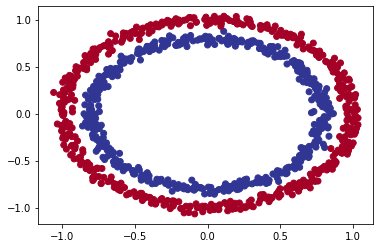

In [20]:
##visualize a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

**Input and output shapes**

In [21]:
## check the shapes of features and model
X.shape,y.shape

((1000, 2), (1000,))

In [22]:
## check of many samples we have
len(X),len(y)

(1000, 1000)

In [23]:
## view the first example of features
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

**Steps in modelling**

In [27]:
## Set random seed
tf.random.set_seed(42)

## create a model using sequential API (keras)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

## compiling the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

## fit the model
model_1.fit(X,y,epochs = 5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [28]:
## train the model for longer
model_1.fit(X,y,epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [30]:
## Set random seed
tf.random.set_seed(42)

## create a model using sequential API (keras)
## creating additional layer
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)])

## compiling the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

## fit the model
model_2.fit(X,y,epochs = 100, verbose = 0)


In [31]:
## evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

**Improve the model**

In [34]:
## set random seed
tf.random.set_seed(42)

## create the model
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100,input_shape = (None,1)),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

## compile the model
model_3.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## fit the model
model_3.fit(X,y,epochs = 100)                               

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.4553 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.4902
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.4953
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.4952
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.4778
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.4987
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.4893
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.4848
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.5008
Epoch 11/

In [41]:
import numpy as np
def plot_decision_boundary(model,X,y):

  ## define the axis boundaries of a plot and create a meshgrid
  x_min,x_max = X[:,0].min() -.1, X[:,0].max()+.1
  y_min,y_max = X[:,1].min() -.1, X[:,1].max()+.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  ## create X values
  x_in = np.c_[xx.ravel(),yy.ravel()]

  ## make prediction using the trained model
  y_pred = model.predict(x_in)

  ## check for the multi class
  if len(y_pred[0])>1:
    print('Doing multiclass classification...')
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('Doing binary classification...')
    y_pred = np.round(y_pred).reshape(xx.shape)

  ## plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = .7)
  plt.scatter(X[:,0], X[:,1],c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing multiclass classification...


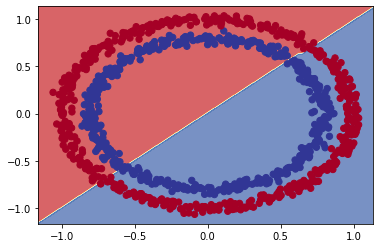

In [42]:
## check out the prediction of our model is making
plot_decision_boundary(model_3, X, y)

- Looks like model is trying to draw a straight line
- The main issue is that our data is not separable by a straight line


In [44]:
## set random seed
tf.random.set_seed(42)

## create some regression data
X_regression = np.arange(0,1000,5)
y_regression = np.arange(0,1000,5)

## split it into a training and test dataset
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

##
model_3.fit(tf.expand_dims(X_reg_train,axis = -1),
            y_reg_train,
            epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: -225053954277376.0000 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: -4264177212325888.0000 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: -15903398461177856.0000 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: -53255210763550720.0000 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: -137792918906732544.0000 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -345307124261191680.0000 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -795309745719214080.0000 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -1479519201570848768.0000 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 

In [46]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, None, 100)         200       
                                                                 
 dense_10 (Dense)            (None, None, 10)          1010      
                                                                 
 dense_11 (Dense)            (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [47]:
## sett up random model
tf.random.set_seed(42)

## recreate the model
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

## change the loss and metrics of our compiled model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

## fit compiled model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),
            y_reg_train,
            epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 148.2158 - mae: 148.2158
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 40.6552 - mae: 40.6552
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 28.4548 - mae: 28.4548
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 13.7264 - mae: 13.7264
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 24.5753 - mae: 24.5753
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 10.4157 - mae: 10.4157
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 9.1379 - mae: 9.1379
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 9.2649 - mae: 9.2649
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 5.0359 - mae: 5.0359
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 3.1257 - mae: 3.1257
Epoch 11/100
5/5 [==============================] - 0s 6ms/step -

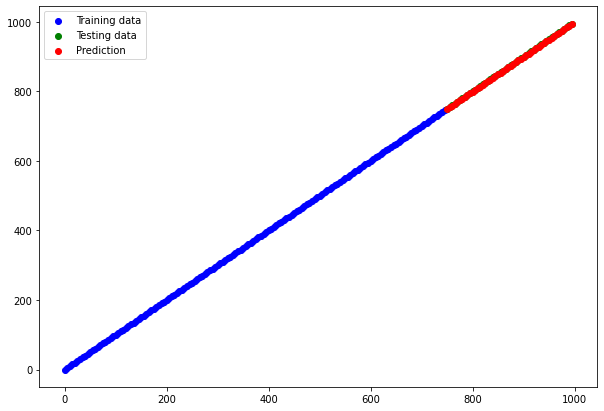

In [49]:
y_reg_pred = model_3.predict(y_reg_test)

## plot the model prediction against our regression model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label='Training data')
plt.scatter(X_reg_test,y_reg_test,c='g',label='Testing data')
plt.scatter(X_reg_test,y_reg_pred,c='r',label='Prediction')
plt.legend();

In [51]:
## set random seed
tf.random.set_seed(42)

## create the model
model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(1,activation =tf.keras.activations.linear),
          tf.keras.layers.Dense(1)])

## compile the model
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.001),
                metrics = ['accuracy'])

## fit the model
history = model_4.fit(X,y,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3804 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7024 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4002 - accuracy: 0.5000
Epoch 11/100
32/32 [=

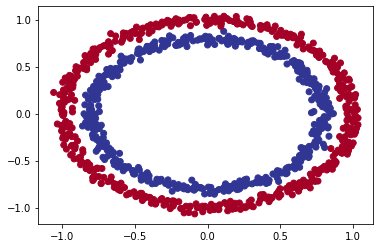

In [54]:
## check out the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

Doing binary classification...


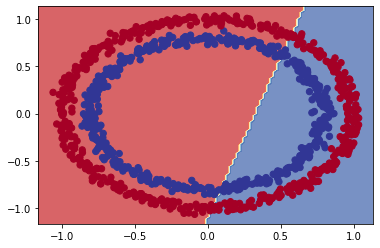

In [55]:
## check the decision boundary
plot_decision_boundary(model_4,X,y)

In [56]:
## set random seed
tf.random.set_seed(42)

## create the model
model_5 = tf.keras.Sequential([
          tf.keras.layers.Dense(1,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(1)])

## compile the model
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.001),
                metrics = ['accuracy'])

## fit the model
history = model_5.fit(X,y,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/100
32/32 [=

In [57]:
## set random seed
tf.random.set_seed(42)

## create the model
model_6 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(4,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(1)])

## compile the model
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.001),
                metrics = ['accuracy'])

## fit the model
history = model_6.fit(X,y,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
32/32 [=

Doing binary classification...


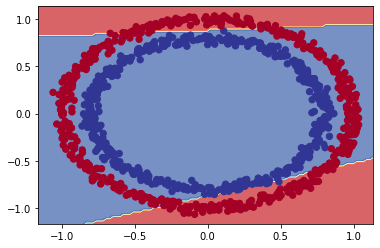

In [58]:
## check the predictions using 2 hidden layers
plot_decision_boundary(model_6,X,y)

In [60]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_7 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(4,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(1,activation =tf.keras.activations.sigmoid)])

## compile the model
model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=.001),
                metrics = ['accuracy'])

## fit the model
history = model_7.fit(X,y,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

In [61]:
## evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing binary classification...


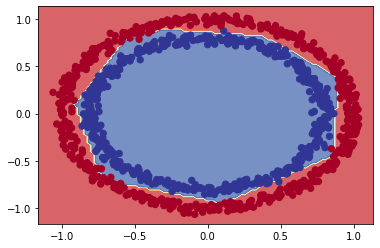

In [62]:
## view the predictions of the model with relu and sigmoid activation function
plot_decision_boundary(model_7,X,y)

In [64]:
## create a toy tensor
A= tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

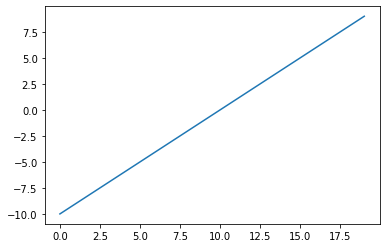

In [65]:
plt.plot(A);

In [66]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

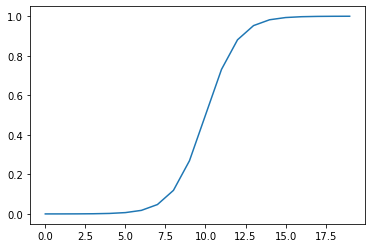

In [67]:
plt.plot(sigmoid(A));

In [68]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

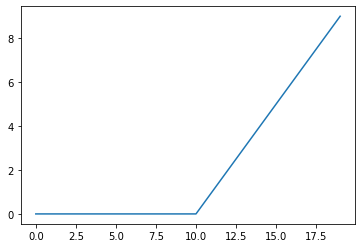

In [69]:
plt.plot(relu(A));

In [72]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [73]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [74]:
## split data into train and test sets
X_train, y_train = X[:800],y[:800] ##80% of the data taken for training
X_test,y_test = X[800:],y[800:] ##20% of the data taken for testing

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [75]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_8 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(4,activation =tf.keras.activations.relu),
          tf.keras.layers.Dense(1,activation =tf.keras.activations.sigmoid)])

## compile the model
model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ['accuracy'])

## fit the model
history = model_8.fit(X_train,y_train,epochs = 25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [76]:
##Evaluate the model on test data
loss,accuracy = model_8.evaluate(X_test,y_test)
print(f'Model loss on the test set:{loss}')
print(f'Model accuracy on the test set:{100*accuracy:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on the test set:0.12468849867582321
Model accuracy on the test set:100.00%


Doing binary classification...
Doing binary classification...


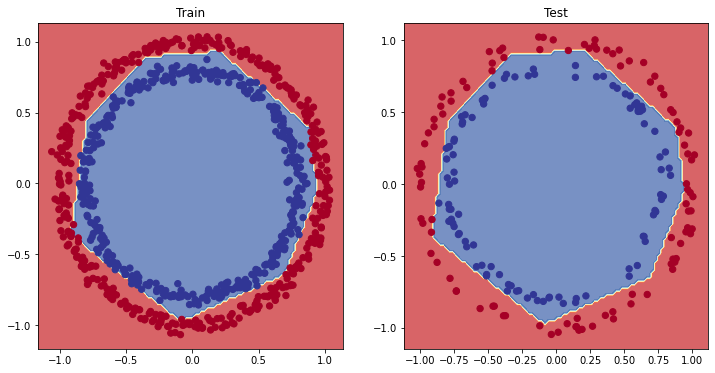

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X=X_test,y=y_test);

In [78]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


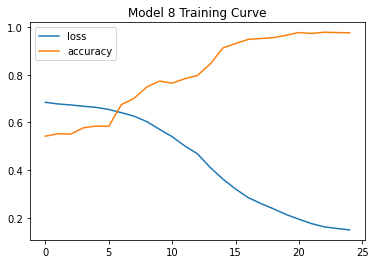

In [79]:
## plotting the loss curve vs accuracy
pd.DataFrame(history.history).plot()
plt.title('Model 8 Training Curve');

In [81]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_9 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation ='relu'),
          tf.keras.layers.Dense(4,activation ='relu'),
          tf.keras.layers.Dense(1,activation ='sigmoid')])

## compile the model
model_9.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam', ## same as tf.keras.optimizers.Adam with default settings 
                metrics = ['accuracy'])
## create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

## fit the model
history = model_9.fit(X_train,y_train,epochs = 100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - loss:

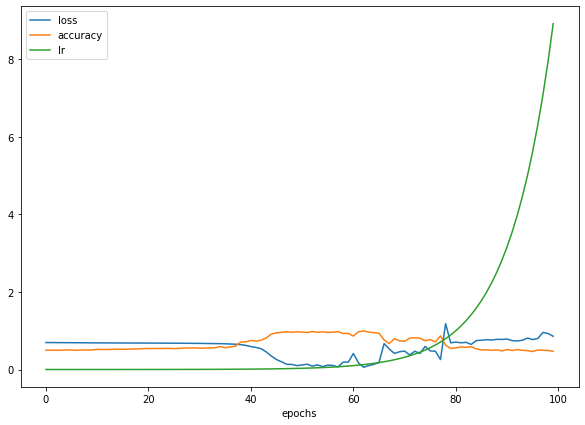

In [84]:
## check out history 
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

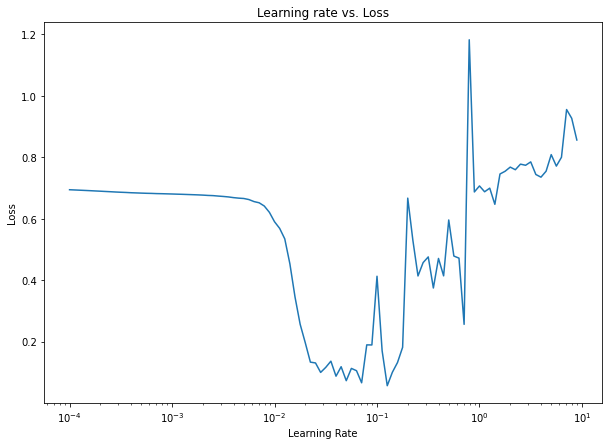

In [85]:
## plot the learning rate vs. loss
lrs = 1e-4*(10**(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss');

- The rule of thumb is take the learning rate value where the loss is still decreasing but not quite flattened out.

In [104]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_10 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation ='relu'),
          tf.keras.layers.Dense(4,activation ='relu'),
          tf.keras.layers.Dense(1,activation ='sigmoid')])

## compile the model
model_10.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = ['accuracy'])
## fit the model
history = model_10.fit(X_train,y_train,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/100
25/25 [=

In [105]:
## evaluate
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9950


[0.018565809354186058, 0.9950000047683716]

Doing binary classification...
Doing binary classification...


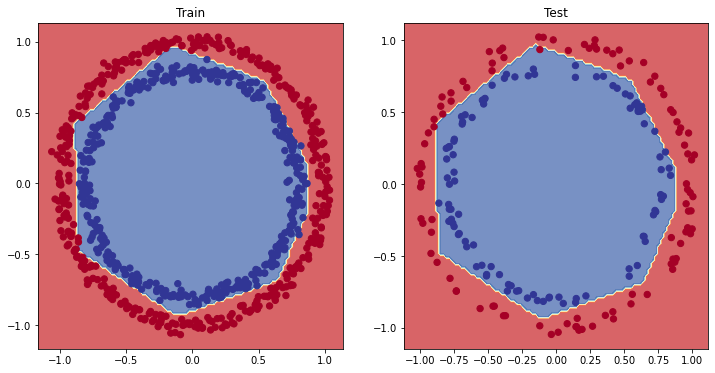

In [106]:
## plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10,X=X_test,y=y_test);

In [107]:
## Check the accuracy of our model
loss,accuracy=model_10.evaluate(X_test,y_test)
print(f'Model loss on test set:{loss}')
print(f'Model accuracy on test set:{100*accuracy:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9950
Model loss on test set:0.018565809354186058
Model accuracy on test set:99.50%


In [90]:
## create a confusion matrix
from sklearn.metrics import confusion_matrix

## make prediction
y_preds = model_10.predict(X_test) 

## create confusion matrix
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [108]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [109]:
y_preds

array([[9.99415815e-01],
       [1.00000000e+00],
       [9.99128461e-01],
       [9.99999166e-01],
       [3.30188870e-03],
       [8.38025808e-05],
       [9.99769092e-01],
       [8.27493841e-06],
       [9.99991417e-01],
       [1.03733966e-11],
       [8.74390244e-01],
       [1.57383978e-02],
       [9.99906301e-01],
       [9.37633634e-01],
       [9.99994755e-01],
       [9.99863744e-01],
       [9.99988317e-01],
       [9.98865485e-01],
       [1.20528775e-05],
       [9.99968290e-01],
       [5.06654469e-05],
       [9.99018431e-01],
       [9.99519348e-01],
       [9.99619722e-01],
       [5.84191202e-12],
       [9.39926505e-01],
       [9.93507028e-01],
       [1.34994149e-01],
       [2.58382414e-07],
       [9.99999762e-01],
       [1.85439731e-07],
       [9.99548256e-01],
       [9.99545455e-01],
       [8.78337026e-03],
       [1.48507544e-08],
       [9.99847054e-01],
       [9.99997795e-01],
       [9.99112368e-01],
       [9.99964952e-01],
       [9.99980152e-01],


In [110]:
## conver prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [111]:
## create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

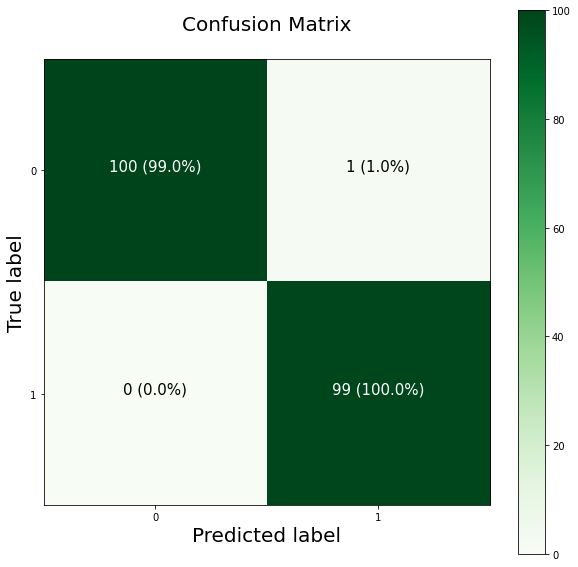

In [112]:
import itertools

figsize=(10,10)

## create confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] ## normalize it
n_classes = cm.shape[0]

## prettify it
fig,ax = plt.subplots(figsize=figsize)
## create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Greens)
fig.colorbar(cax)

## create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

## label the axis
ax.set(title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

## set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

## adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

## set threshold for different colors
threshold = (cm.max()+cm.min())/2.

## plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i,j]>threshold else 'black',
           size = 15)

In [113]:
## what does itertools.products do?
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  print(i,j)

0 0
0 1
1 0
1 1


**Working with larger examples (multiclass classification)**

In [114]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [175]:
## the data has already been sorted into training and testing sets
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [176]:
## show the first training example
print(f'Training Sample:\n{train_data[0]}\n')
print(f'Training label:{train_labels[0]}')

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [177]:
## check the shape of our data
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

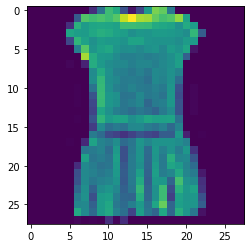

In [178]:
## plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[3]);

In [179]:
## check our samples label
train_labels[7]

2

In [180]:
class_names=['T-shirt/top','Trouser','Pullover','Pullover','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_names)         

10

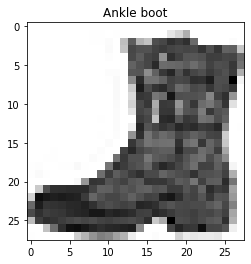

In [181]:
## plot an example image and its label
plt.imshow(train_data[150],cmap=plt.cm.binary)
plt.title(class_names[train_labels[150]]);

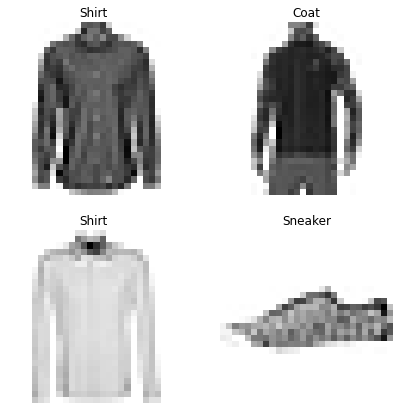

In [182]:
## plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [183]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_11 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)), ## input layer                      
          tf.keras.layers.Dense(4,activation ='relu'),
          tf.keras.layers.Dense(4,activation ='relu'),
          tf.keras.layers.Dense(10,activation ='softmax')]) ## output shape is 10

## compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), ## different loss function
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
## fit the model
non_norm_history = model_11.fit(train_data,
                                 train_labels,
                                 epochs = 10,
                                 validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [184]:
## check the shapes og=f our model
#Note: the 'None' in (None,784) is for batch_size
model_11.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_79 (Dense)            (None, 4)                 3140      
                                                                 
 dense_80 (Dense)            (None, 4)                 20        
                                                                 
 dense_81 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [185]:
## check the min and max of the training data set
train_data.min(),train_data.max()

(0, 255)

In [186]:
## divide the train and test images by the max values (normalize it)
train_data = train_data/225.0
test_data = test_data/225.0

## check the min and max of training dataset
train_data.min(),train_data.max()

(0.0, 1.1333333333333333)

In [187]:
# set random seed
tf.random.set_seed(42)

## create the model
model_12 = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape=(28,28)),
           tf.keras.layers.Dense(4,activation='relu'),
           tf.keras.layers.Dense(4,activation='relu'),
           tf.keras.layers.Dense(10,activation='softmax')                     
])

## compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), ## different loss function
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## fit the model to the normalized data
norm_history = model_12.fit(train_data,
                                 train_labels,
                                 epochs = 10,
                                 validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0406 - accuracy: 0.6434 - val_loss: 0.6952 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6388 - accuracy: 0.7790 - val_loss: 0.6457 - val_accuracy: 0.7840
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5945 - accuracy: 0.7940 - val_loss: 0.6275 - val_accuracy: 0.7784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5751 - accuracy: 0.8000 - val_loss: 0.6145 - val_accuracy: 0.7878
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5647 - accuracy: 0.8021 - val_loss: 0.6231 - val_accuracy: 0.7879
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5545 - accuracy: 0.8052 - val_loss: 0.5885 - val_accuracy: 0.7953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5491 - accuracy: 0.8080 - val_loss: 0.6100 - val_accuracy:

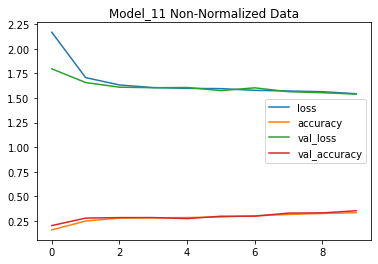

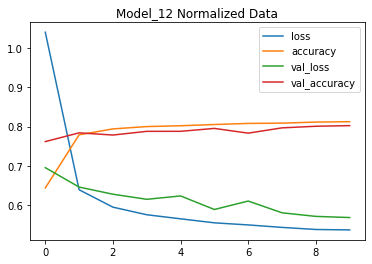

In [189]:
 import pandas as pd
 ## plot non normalized data loss curve
 pd.DataFrame(non_norm_history.history).plot(title='Model_11 Non-Normalized Data')
 ## plot  normalized data loss curve
 pd.DataFrame(norm_history.history).plot(title='Model_12 Normalized Data');

In [193]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_13 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
           tf.keras.layers.Dense(4,activation='relu'),
           tf.keras.layers.Dense(4,activation='relu'),
           tf.keras.layers.Dense(10,activation='softmax')])

## compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

## fit the model
find_lr_history = model_13.fit(train_data,
                      train_labels,
                      epochs = 40, ## model is already doing pretty good
                      validation_data=(test_data,test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9041 - accuracy: 0.3181 - val_loss: 1.6116 - val_accuracy: 0.4225 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3537 - accuracy: 0.5232 - val_loss: 1.1368 - val_accuracy: 0.6458 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9743 - accuracy: 0.6850 - val_loss: 0.9009 - val_accuracy: 0.6971 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8248 - accuracy: 0.7176 - val_loss: 0.8104 - val_accuracy: 0.7184 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7557 - accuracy: 0.7392 - val_loss: 0.7572 - val_accuracy: 0.7381 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7137 - accuracy: 0.7529 - val_loss: 0.7257 - val_accuracy: 0.7468 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

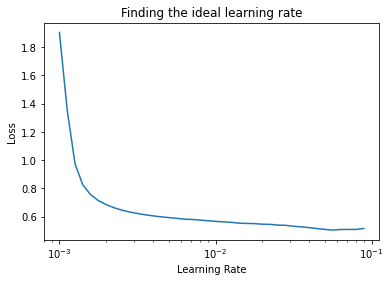

In [194]:
## plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3*(10**(np.arange(40)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate');

In [195]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_14 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
           tf.keras.layers.Dense(4,activation='relu'),
           tf.keras.layers.Dense(4,activation='relu'),
           tf.keras.layers.Dense(10,activation='softmax')])

## compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

## fit the model
history = model_14.fit(train_data,
                      train_labels,
                      epochs = 20, ## model is already doing pretty good
                      validation_data=(test_data,test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0406 - accuracy: 0.6434 - val_loss: 0.6952 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6388 - accuracy: 0.7790 - val_loss: 0.6457 - val_accuracy: 0.7840
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5945 - accuracy: 0.7940 - val_loss: 0.6275 - val_accuracy: 0.7784
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5751 - accuracy: 0.8000 - val_loss: 0.6145 - val_accuracy: 0.7878
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5647 - accuracy: 0.8021 - val_loss: 0.6231 - val_accuracy: 0.7879
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5545 - accuracy: 0.8052 - val_loss: 0.5885 - val_accuracy: 0.7953
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5491 - accuracy: 0.8080 - val_loss: 0.6100 - val_accuracy:

In [223]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=5):
  ## create a confusion_matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  ##plot the figure and make it better
  fig,ax = plt.subplots(figsize=figsize)
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  ## are there any list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ## label the axis
  ax.set(title = 'confusion matrix',
         xlabel='predicted label',
         ylabel='True labels',
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  ## set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ## set threshold for different colors
  threshold = (cm.max()+cm.min())/2.
  
  ## plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i,j]>threshold else 'black',
           size = 10)
  

In [218]:
## make prediction with the most recent model
y_probs = model_14.predict(test_data)

## view first 5 predictions
y_probs[:5]

array([[4.5709908e-11, 3.4036244e-14, 1.1248039e-05, 4.1385256e-08,
        7.6922937e-05, 1.0520022e-01, 6.3720009e-08, 8.9407951e-02,
        4.2918795e-03, 8.0101174e-01],
       [2.2493896e-06, 6.6629926e-19, 9.6056372e-01, 2.7976262e-07,
        1.7751746e-02, 5.4292772e-14, 2.1164490e-02, 4.9648955e-31,
        5.1744690e-04, 1.8746458e-09],
       [5.5904224e-05, 9.9717206e-01, 8.5665004e-09, 2.7701638e-03,
        6.2978472e-07, 8.1450772e-24, 1.2062363e-06, 7.2765237e-20,
        4.7130044e-08, 1.1754265e-15],
       [5.6167417e-05, 9.9242002e-01, 6.6798201e-08, 7.5108227e-03,
        7.8444937e-06, 2.1756996e-20, 3.6648676e-06, 1.9242031e-15,
        1.2962495e-06, 1.0221447e-12],
       [7.3435314e-02, 1.2298245e-06, 2.1229899e-01, 9.3522575e-03,
        4.7871612e-02, 2.5330847e-14, 6.5650916e-01, 1.2755502e-22,
        5.3149275e-04, 6.8218720e-10]], dtype=float32)

In [219]:
## see the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [220]:
## convert all of the prediction from probabilities to labels
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [221]:
## check a non prettified confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels,
                 y_pred=y_preds)

array([[700,   6,  23,  85,   8,   4, 164,   0,  10,   0],
       [  5, 936,   3,  39,   7,   0,  10,   0,   0,   0],
       [ 25,   1, 647,  12, 181,   0, 119,   0,  15,   0],
       [ 46,  10,  16, 816,  50,   0,  41,   1,  20,   0],
       [  0,   0,  90,  27, 788,   2,  83,   0,   8,   2],
       [  0,   0,   0,   0,   0, 898,   0,  58,   8,  36],
       [116,   3, 155,  57, 160,   2, 489,   0,  18,   0],
       [  0,   0,   0,   0,   0,  32,   0, 931,   0,  37],
       [  4,   1,  35,  13,  11,  12,   8,   7, 908,   1],
       [  0,   0,   1,   0,   2,  17,   0,  51,   1, 928]])

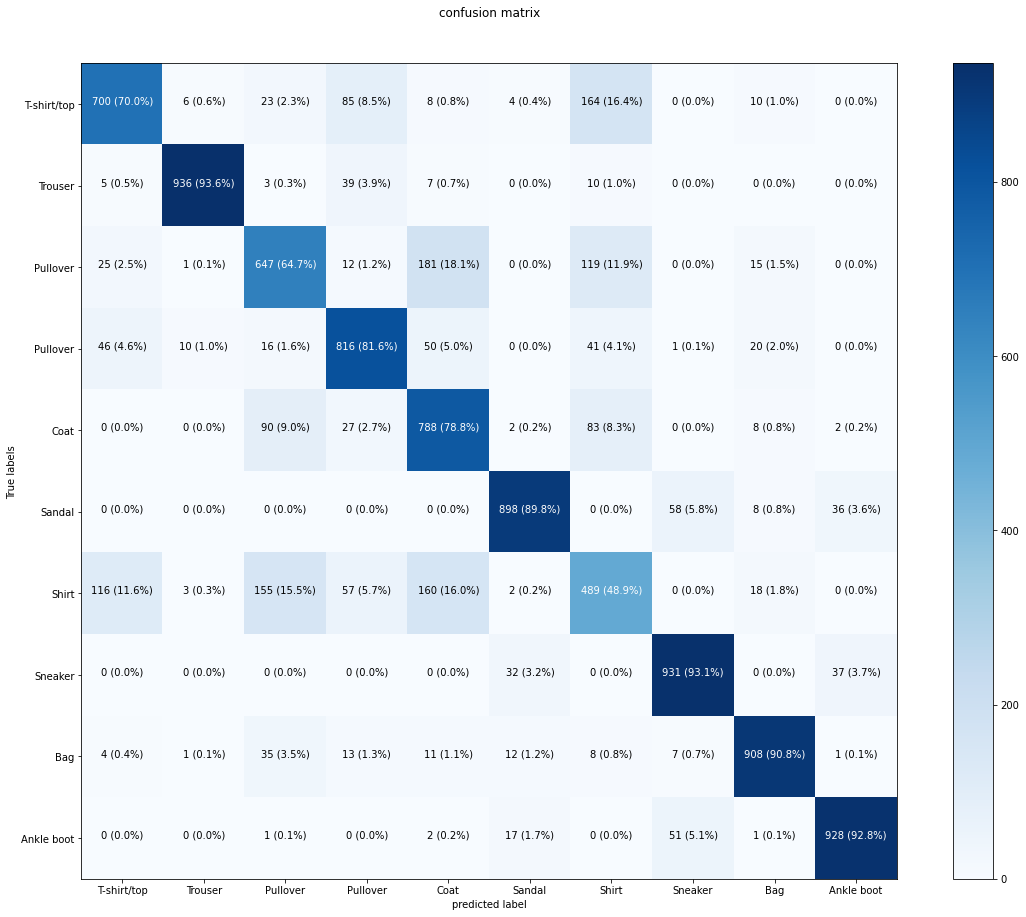

In [225]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names,figsize=(20,15),text_size=10)

In [228]:
import random
def plot_random_image(model,images,true_labels,classes):
  ## set up a random integer
  i = random.randint(0,len(images))

  ## create predictions and targets
  target_images = images[i]
  pred_probs = model.predict(target_images.reshape(1,28,28))
  pred_labels = classes[pred_probs.argmax()]
  true_labels = classes[true_labels[i]] 

  ## plot the target image
  plt.imshow(target_images,cmap=plt.cm.binary)

  ## change the color of the titles depending on if the prediction is right ot wrong
  if  pred_labels == true_labels:
    color = 'green'
  else:
    color = 'red'

  ## add xlabel information prediction
  plt.xlabel('Pred:{} {:2.0f}% (True:{})'.format(pred_labels,100*tf.reduce_max(pred_probs), true_labels), color=color)


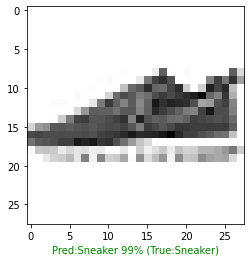

In [242]:
## check out a random image as well as 
plot_random_image(model=model_14,images=test_data,true_labels=test_labels,classes=class_names)

In [244]:
model_14.layers

In [245]:
model_14.layers[1]

In [246]:
## get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

## shape =1 weight matrix the size of our output data (28x28) per neuron (4)
weights,weights.shape

(array([[ 0.76590997, -0.2450761 , -0.98144335, -0.96433383],
        [ 0.28751853, -0.6491844 , -0.52688277,  0.01449623],
        [ 0.76377517,  0.4805543 , -1.1649456 , -0.6719296 ],
        ...,
        [-0.30215454,  0.4634487 , -0.24238154,  0.3063962 ],
        [-0.4492185 ,  0.6986037 ,  0.21797718, -0.3850831 ],
        [ 0.22543125,  0.06949687, -0.01300354,  0.0272863 ]],
       dtype=float32), (784, 4))

In [247]:
biases,biases.shape

(array([ 0.07168718,  0.01838255, -0.31332317,  0.79888225], dtype=float32),
 (4,))

In [248]:
model_14.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_91 (Dense)            (None, 4)                 3140      
                                                                 
 dense_92 (Dense)            (None, 4)                 20        
                                                                 
 dense_93 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


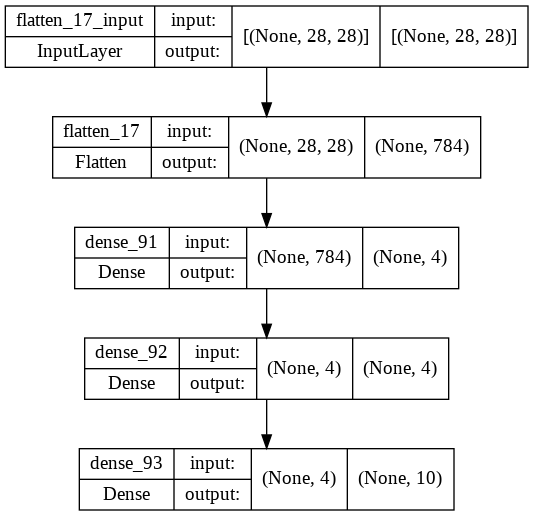

In [249]:
from tensorflow.keras.utils import plot_model

## see the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)